<a href="https://colab.research.google.com/github/rajagopalmotivate/MLinQuantamScience/blob/main/Nandri_Nandri_DM21_plot_energy_vs_bond_lenght_ver_J400_12_Jun_2022_WORKS_Well_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple comparision of DFT vs NN 
## Hypothesis: NN performs as good as DFT 
## Experiment: Compare 

In [1]:
EXPNO ='ENERGYVsBOND_0003_C'

dictPeriodicTable = {'C': 6}
 
elementname ='C' 


In [2]:
firstTimeorRestart = True

#  basis set and as per DM21 authors
For all benchmarking, we use the large aug'-def2-QZVP basis set  

During training, 
For all the atoms and diatomic molecules in the regression set we generate the features for
the SCF loss at PySCF grid level 2 and use the largest basis set in the aug-pc-X family such
that the number of basis functions is less than 128. 
For larger neutral molecules we use grid
level 1 and the largest basis set with less than 128 basis functions from cc-pCV(Q+d)Z, ccpCV(T+d)Z, cc-pV(T+d)Z or cc-pV(D+d)Z

In [3]:
listBasisSet = ['6-21g' , 'cc-pvqz' , 'def2-qzvp'  ]

listBasisSet = ['def2-QZVP' , 'cc-pCVTZ' ,  'aug-pc-3' , 'aug-cc-pV(Q+d)Z', 'aug-cc-pCV5Z', 'aug-ccpwCV5Z', '6-21g']

listBasisSet = ['cc-pCVDZ' , 'def2-QZVP' , 'cc-pCVTZ' ,  'aug-pc-3' , 'aug-cc-pV(Q+d)Z', 'aug-cc-pCV5Z', 'aug-ccpwCV5Z', '6-31g', 'STO-3G' , 'def2-QZVPPD' ]

listBasisSet = ['def2-QZVP' , 'cc-pCVTZ', 'cc-pVQZ' , 'cc-pVXZ', 'aug-cc-pV(Q+d)Z' , '6-31g' ]

listBasisSet = [   'cc-pVQZ' , 'def2-QZVP' , 'cc-pCVTZ',  'cc-pVXZ' , '6-31g' ]

listBasisSet = [   'cc-pVQZ' , 'def2-QZVP' , 'cc-pCVQZ'  ]

listBasisSet = [   'cc-pVQZ' , 'cc-pVTZ', 'cc-pVDZ',  'cc-pCVQZ', 'cc-pCV5Z',  'def2-QZVP', 'def2-TCVPPD', '6-31g' ,'STO-3G'   ]

listBasisSet = [   'cc-pVQZ', 'def2-QZVP']

listBasisSet = [  'cc-pV7Z', 'cc-pV6Z',  'cc-pVQZ' , 'cc-pVDZ' , 'cc-pCVQZ',    'def2-QZVP', 'def2-7CVPPD', '6-31g' ,'STO-3G'   ]


listBasisSet = [ 'cc-pVQZ' , 'cc-pVDZ' , "aug'-def2-QZVP", '6-31g' , 'aug-pcJ-4', 'cc-pCV(Q+d)Z']

listBasisSet = [ 'cc-pVQZ' , 'cc-pVDZ' , 'def2-QZVP', '6-31g' ]


listBasisSet = [   'cc-pVDZ' ]


#listBasisSet = [ 'cc-pVQZ' , "aug'-def2-QZVP"]
 

In [4]:
#dictPeriodicTable = {'H': 1, 'He': 2, 'Li': 3, 'Be': 4, 'B': 5, 'C': 6, 'N': 7, 'O': 8, 'F': 9, 'Ne': 10 }

#dictPeriodicTable = {'H': 1, 'He': 2, 'Li': 3, 'Be': 4, 'B': 5, 'C': 6, 'N': 7, 'O': 8, 'F': 9, 'Ne': 10 , 'Na':11, 'Mg':12 , 'Al':13, 'Si':14, 'P':15, 'S':16 , 'Cl':17, 'Ar':18}

 
dictPeriodicTableSpinValues = {'H': 1,  'He': 0, 'Li': 1, 'Be': 0, 'B': 1, 'C': 0, 'N': 1, 'O': 0, 'F': 1, 'Ne': 0 }



print(str( 'Weight'  + ' ' +   ' \t Element     \t  SPIN'    ))
 
 
  


Weight  	 Element     	  SPIN


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 1: Install

In [6]:
#!pip install git+git://github.com/deepmind/deepmind-research.git#subdirectory=density_functional_approximation_dm21

In [7]:
!git clone https://github.com/deepmind/deepmind-research.git


Cloning into 'deepmind-research'...
remote: Enumerating objects: 2581, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 2581 (delta 55), reused 182 (delta 55), pack-reused 2372
Receiving objects: 100% (2581/2581), 92.04 MiB | 17.05 MiB/s, done.
Resolving deltas: 100% (1206/1206), done.


In [8]:
cd deepmind-research/density_functional_approximation_dm21


/content/deepmind-research/density_functional_approximation_dm21


In [9]:
pwd

'/content/deepmind-research/density_functional_approximation_dm21'

In [10]:
!pip install .


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/deepmind-research/density_functional_approximation_dm21
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
  Created wheel for density-functional-approximation-dm21: filename=density_functional_approximation_dm21-0.1-py3-none-any.whl size=6085418 sha256=7b598c5654b2a2f5c6828c96ecd47ec2646981ff61c1123f283548b1fe5daf8b
  Stored in directory: /tmp/pip-ephem-wheel-cache-chdawm01/wheels/3b/c5/70/0200d858561857222265157381fd4ad73ce078117b4821cd36
Successfully built density-functi

## Step 2: Configure RAM optionally

In [94]:
from pyscf import gto
from pyscf import dft

from pyscf import __config__
MAX_MEMORY = getattr(__config__, 'MAX_MEMORY')
MAX_MEMORY

110883

In [95]:
import psutil
systemresources = psutil.virtual_memory()

MAX_MEMORY = round( systemresources.available  * 0.000009)
PYSCF_MAX_MEMORY  = MAX_MEMORY

print('Configured to use max RAM resources of  ' + str(MAX_MEMORY))

Configured to use max RAM resources of  99219


In [96]:
setattr(__config__, 'MAX_MEMORY', PYSCF_MAX_MEMORY)

setattr(__config__, 'PYSCF_MAX_MEMORY', PYSCF_MAX_MEMORY)



In [97]:
MAX_MEMORY = getattr(__config__, 'MAX_MEMORY')
MAX_MEMORY

99219

## Step 3: 

### 3.1 Define the periodic table (Define atomic weight and periodic weight for each element)

### 3.2 Define the spin value for each element 

### 3.3 You can load any new basis function.  Just visit the Basics Exchange and get a new Basis Function URL .  
#### here we download a basis set full defintion file from an URL and then use it to construct a molecule  

#### To get a web URL, just visit https://www.basissetexchange.org/


http://vergil.chemistry.gatech.edu/courses/chem6485/pdf/basis-sets.pdf 

https://youtu.be/irQ_c_fW5f8?t=971


1.   cc-pCVXZ or aug-cc-pCVXZ basis sets;  you should use basis sets like this if you do not freeze core
2.   cc-pVQZ is great for CCSD(T)



In [98]:
def trydownloadingBasisSet(ElementsinMolecule, BasisSet, versionno):  
    target_url = 'https://www.basissetexchange.org/api/basis/' + str(BasisSet) +  '/format/nwchem/?version='+ str( versionno)+'&elements=' + str(ElementsinMolecule) 
    #print(target_url)
    try:
      textfile = urllib.request.urlopen(target_url)    
      mydownloadedfile = ""
      for line in textfile:
          #print(line.decode('utf-8')) #utf-8 or iso8859-1 or whatever the page encoding scheme is
          mydownloadedfile += line.decode('utf-8') 
      return True    
    except:
      return False

In [99]:
import urllib   # the lib that handles the url stuff
import urllib.request  # the lib that handles the url stuff


def getValidBasisSet(MoleculeList):
  ValidatedBasisSet = []
  ValBSSetVersionNumberDict = {}
  errorproneBasisSet = []
  for BasisSet in listBasisSet:
    didnotworkatallforanyversion = True
    for versionno in range(0,4):
      isworking = trydownloadingBasisSet(MoleculeList, BasisSet, versionno)
      if isworking == True:
        didnotworkatallforanyversion = False
        ValBSSetVersionNumberDict[BasisSet] = versionno
        ValidatedBasisSet.append(BasisSet)
        break
    if didnotworkatallforanyversion == True:
      errorproneBasisSet.append(BasisSet)
  return ValidatedBasisSet 

In [100]:
def downloadBasisSetAutoVersion(ElementsinMolecule, BasisSet):  
    for versionumber in range (0,4):
      target_url = 'https://www.basissetexchange.org/api/basis/' + str(BasisSet) +  '/format/nwchem/?version='+ str( versionumber)+'&elements=' + str(ElementsinMolecule) 
      try:
        textfile = urllib.request.urlopen(target_url)    
        mydownloadedfile = ""
        for line in textfile:
            #print(line.decode('utf-8')) #utf-8 or iso8859-1 or whatever the page encoding scheme is
            mydownloadedfile += line.decode('utf-8') 
        return mydownloadedfile    
      except:
        return None

In [101]:

PerdiocTableNumber = dictPeriodicTable [elementname]
ValidatedBasisSet = getValidBasisSet(PerdiocTableNumber)
len(ValidatedBasisSet)
ValidatedBasisSet

['cc-pVDZ']

In [102]:
basisSethandpicked =[  ]

In [103]:
#listBasisSet = basisSet652

In [104]:
try:
  print("Hello")
except:
  print("Something went wrong")
else:
  print("Nothing went wrong")

Hello
Nothing went wrong


In [105]:
#downloadBasisSetAutoVersion(1,'3-21G')

geomtery optimization

In [106]:
!	pip install -U pyberny


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
from pyscf import gto
from pyscf import scf
from pyscf import cc
from pyscf.cc import ccsd_t_lambda_slow as ccsd_t_lambda
from pyscf.grad import ccsd_t as ccsd_t_grad
from pyscf.geomopt import berny_solver

def f_usefforberny_solver(mol):
    # Compute CCSD(T) energy
    mf = scf.RHF(mol).run()
    mycc = cc.CCSD(mf).run()
    et_correction = mycc.ccsd_t()
    e_tot = mycc.e_tot + et_correction

    # Compute CCSD(T) gradients
    g = ccsd_t_grad.Gradients(mycc).kernel()
    print('CCSD(T) nuclear gradients:')
    print(g)
    return e_tot, g


In [108]:
 hashLookUpMolecules = dict()
 

In [109]:
def GetoptimizedMolecule(randomMol):
  global hashLookUpMolecules
  print('****************************************************************GEOMENTRY OPTIMIZATION Starts***********************************************')  
  print('MOLECULE KEY is')
  print([randomMol.basis])
  if randomMol in hashLookUpMolecules:
    saved_mol = hashLookUpMolecules[randomMol]
    print('****************************************************************GEOMENTRY looked up from Hashtable***********************************************')  
    return saved_mol
  fake_method = berny_solver.as_pyscf_method(randomMol, f_usefforberny_solver)
  new_mol = berny_solver.optimize(fake_method , maxsteps=400)
  print('Old geometry (Bohr)')
  print(randomMol.atom_coords())  
  print('New geometry (Bohr)')
  print(new_mol.atom_coords())  
  hashLookUpMolecules[randomMol] = new_mol
  print('****************************************************************GEOMENTRY OPTIMIZATION Ends***********************************************')  
  return new_mol


DM21

In [110]:
import density_functional_approximation_dm21 as dm21
from pyscf import gto
from pyscf import dft

In [111]:
import pandas as pd
import numpy as np


In [112]:
GlobalBONDLENGTH = 0.0001

In [113]:
def buildaMoleculeSpin(elementname, elementname2, mydownloadedfile, mydownloadedfile2, trythisspin ):
      global GlobalBONDLENGTH
      mol = gto.Mole()

      #mol.unit = 'B'
      mol.unit = 'Angstrom'
      
      mol.atom = [[elementname, ( 0, 0, GlobalBONDLENGTH)], [elementname2, (0, 0, -1* GlobalBONDLENGTH)] ]
      mol.spin =  trythisspin
      mol.symmetry = True
      mol.basis = { elementname: gto.parse(mydownloadedfile)  ,     elementname2: gto.parse(mydownloadedfile2)        }
      #mol.max_memory = PYSCF_MAX_MEMORY
      mol.build()
      return mol


Geometry for C2 (Carbon diatomic) 1Σg+ D*H

 
https://cccbdb.nist.gov/geom3x.asp?method=63&basis=25
```
CCSD(T)=FULL/cc-pVQZ

Atom	X	Y	Z
C	0.0000000	0.0000000	0.6210880
C	0.0000000	0.0000000	-0.6210880



CCSD(T)=FULL/cc-pVDZ

Atom	Internal
x (Å)	y (Å)	z (Å)
C1	0.0000	0.0000	0.6211
C2	0.0000	0.0000	-0.6211




In [114]:
def buildaMoleculeTryMOLECULEELEMENTCOUNT2(elementname, elementname2, mydownloadedfile , mydownloadedfile2 ):
  molecule = None 
  for spinvaluecheckthis in range(5):
    try:
      molecule = buildaMoleculeSpin(elementname,elementname2, mydownloadedfile, mydownloadedfile2, spinvaluecheckthis )      
      return molecule, spinvaluecheckthis
      break
    except:
      tempexcept = True
      #print('SPIN is not correct. Auto matically trying another spin value...')
    else:
      tempelse = True
      #print('TRYING SPIN')
  return molecule, spinvaluecheckthis
 


In [115]:
def buildaMoleculeSpinMOLECULEELEMENTCOUNT1(elementname, mydownloadedfile,  trythisspin ):
      mol = gto.Mole()
      #mol.atom = '''H 0 0 0'''
      mol.atom = [[elementname, (0, 0, 0)] ]
      mol.spin =  trythisspin
      mol.basis = { elementname: gto.parse(mydownloadedfile)       }
      mol.build()
      return mol

In [116]:
def buildaMoleculeTryMOLECULEELEMENTCOUNT1(elementname,  mydownloadedfile ):
  molecule = None 
  for spinvaluecheckthis in range(5):
    try:
      molecule = buildaMoleculeSpinMOLECULEELEMENTCOUNT1(elementname, mydownloadedfile, spinvaluecheckthis )      
      return molecule, spinvaluecheckthis
      break
    except:
      tempexcept = True
      #print('SPIN is not correct. Auto matically trying another spin value...')
    else:
      tempelse = True
      #print('TRYING SPIN')
  return molecule, spinvaluecheckthis
 


## Step 4: Expected format of output table 

## Step 5. Input values to be considered in this computation  

## Step 6. Compute Results
## Run the computation for the above input values 

In [117]:
functionalsList = ['b3lyp','M06-2X' , 'SCAN'    ,'wB97X-V',  'PW6B95' , 'pbe']

functionalsList = ['b3lyp','M06-2X' , 'SCAN'    ,'wB97X-V',  'PW6B95' ,  'pbe' ,  'pbe0']

functionalsList = [ 'b3lyp', 'SCAN'  , 'wB97X-V'  , 'pbe']


#functionalsList = ['b3lyp']

In [118]:
from pyscf import dft

# DFT computation of SCF energy  
def SCFenergyFunctionalsbasedonDFTGOLD(mol , functionals ):
  if mol.spin == 0:
    mf = dft.RKS(mol)
  else:
    mf = dft.UKS(mol)
  # functional.
  #mf.xc = 'B3LYP'
  mf.max_memory = PYSCF_MAX_MEMORY
  mf.level_shift = 0.2
  mf.conv_tol = 1e-6
  mf.xc = functionals
  # Run the DFT calculation.
  answerDFT = mf.kernel()
  if mf.converged == False:
    answerDFT = 0   
  return answerDFT



In [119]:

# DFT computation of SCF energy  
def SCFenergyFunctionalsbasedonDFT(mol , functionals ):
    mf = mol.KS()
   # mf.xc = 'b3lyp'
   # mf.xc = 'pbe0'
   # mf.xc = 'M06-2X'
   # mf.xc = 'SCAN'    
   # mf.xc = 'wB97X-V'
   # mf.xc = 'PW6B95'
    mf.xc = functionals
    # Run the DFT calculation.
    answerDFT = mf.kernel()
    return answerDFT

In [120]:
def SCFenergyFunctionalsbasedonNNGOLD(mol,  NNfunctionals ):
    if mol.spin == 0:
      mf = dft.RKS(mol)
    else:
      mf = dft.UKS(mol)
    #mf._numint = dm21.NeuralNumInt(dm21.Functional.DM21m )
    mf._numint = dm21.NeuralNumInt(NNfunctionals)
    mf.max_memory = PYSCF_MAX_MEMORY
    mf.conv_tol = 1e-6
    mf.level_shift = 0.2

    # Run the DFT calculation.
    answerNN = mf.kernel()
    if mf.converged == False:
      answerNN = 0 
    

    return answerNN

In [121]:
def SCFenergyFunctionalsbasedonNN(mol,  NNfunctionals, functionals='b3lyp'):
    mf = mol.KS()
    mf.xc = functionals
    #mf._numint = dm21.NeuralNumInt(dm21.Functional.DM21m )
    mf._numint = dm21.NeuralNumInt(NNfunctionals)
    # Run the DFT calculation.
    answerNN = mf.kernel()
    return answerNN

In [122]:
# DFT computation of SCF energy  
def SCFenergybasedonDFT(mol):
    mf = dft.RKS(mol)
    # Run the DFT calculation.
    answerDFT = mf.kernel()
    return answerDFT

In [123]:
# Neural network based prediction of SCF energy   
def SCFenergybasedonNN(mol):
    mf = dft.RKS(mol)
    mf._numint = dm21.NeuralNumInt(dm21.Functional.DM21)
    # Run the DFT calculation.
    answerNN = mf.kernel()
    return answerNN

In [124]:
# CCSD computation 
def SCFenergybasedonCCSD(mol):
  ccsdanswer = mol.apply('CCSD').run().e_tot
  return ccsdanswer

In [125]:
from pyscf import  scf, cc

# CCSD-T computation 
def SCFenergybasedonCCSDTGOLD(mol):
  try:
    mf = scf.HF(mol).run()
    mf.max_memory = PYSCF_MAX_MEMORY
    mf.level_shift = 0.2
    print (mf.converged)
    mycc = cc.CCSD(mf).run()
    #print('CCSD  energy', mycc.e_tot)
    et = mycc.ccsd_t()
    CCSDTotal = mycc.e_tot + et
  except ZeroDivisionError:
    print('000000000000000000000000000000000000000-------CCSDT Error------------00000000000000000000000. Using CCSD')
    return SCFenergybasedonCCSD(mol)
  #print('CCSD(T) total energy', mycc.e_tot + et)
  return CCSDTotal

  

In [126]:
import urllib   # the lib that handles the url stuff
import urllib.request  # the lib that handles the url stuff
import numpy
from google.colab import files


print( 'No'  + '        ' + 'Element' + '    \t  \t \t ' +  'Basis Set')



No        Element    	  	 	 Basis Set


In [127]:
ValidatedBasisSetSOURCE = getValidBasisSet(PerdiocTableNumber)


In [128]:


def compute1Mol1BasisSet(elementname, ValidatedBasisSetStart , df):
  if True:
    PerdiocTableNumber = dictPeriodicTable [elementname]
    ValidatedBasisSet = ValidatedBasisSetSOURCE[ValidatedBasisSetStart:ValidatedBasisSetStart+1]
    for BasisSet in ValidatedBasisSet:    
      print('***********************************************************')
      print('***********************************************************')
      print('***********************************************************')

      mydownloadedfile = downloadBasisSetAutoVersion(PerdiocTableNumber,BasisSet)      
      molUnoptimized, myspin = buildaMoleculeTryMOLECULEELEMENTCOUNT2(elementname, elementname, mydownloadedfile , mydownloadedfile )
      if molUnoptimized == None:
        return df

      print('.............................................Molecule details......................................................')
      print(molUnoptimized)
      print('In Bohr')
      print(molUnoptimized.atom_coords(unit='Bohr'))
      print('In angstrom')
      print(molUnoptimized.atom_coords(unit='ANG'))


     # mol = GetoptimizedMolecule(molUnoptimized)
      mol = molUnoptimized
        
      print(mol.atom)
      print(mol.atom_coords(unit='Bohr'))
      print(mol.basis)
      print(str( PerdiocTableNumber)  + '        ' + str(elementname) + '    \t  \t \t ' + str(BasisSet))     
      print('.............................................COMPUTING SCF energy......................................................')

      aResultDict = computePart(mol )


      aResultDict['BasisSet'] = [BasisSet]

      dfforOneElement = pd.DataFrame(aResultDict )
      df = df.append(dfforOneElement, ignore_index = True)

      return df


    #  files.download('ComputedEnergy'+str(ValidatedBasisSetStart)+'.csv')


      


In [129]:



def computePart(mol):
  global DFT_energies 
  global NN_engeries 
  global CCSD_energies 
  global CCSD_Tenergies 
  global fci_energies 
  global bond_lengths 
  global Mole_bond_defintions 


  if True:
      aResultDict = {}
      aResultDict['bond_lenght'] = GlobalBONDLENGTH * 2.0
      aResultDict['Weight'] = PerdiocTableNumber
      aResultDict['Element'] = [elementname]
      aResultDict['Molecule'] = [mol.atom]
      aResultDict['Spin'] = [mol.spin]
      aResultDict['BuiltMolecule'] = [  mol.basis   ]

      print('++++++++++++++++++++++++++++++++++++++++++++++++++  CCSD ++++++++++++++++++++++++++++++++++')
      # Run the CCSD calculation.
     # CCSDenergy = SCFenergybasedonCCSD(mol)
     # print('ENERGY Computing using CCSD appoach is = ' + str(CCSDenergy ))
      print('++++++++++++++++++++++++++++++++++++++++++++++++++  CCSD(T) ++++++++++++++++++++++++++++++++++')
      CCSDTenergy = SCFenergybasedonCCSDTGOLD(mol)
      print('ENERGY Computing using CCSD T appoach is = ' + str(CCSDTenergy ))


      #aResultDict['DFTApproach'] = answerDFT
      #aResultDict['NNApproach'] = answerNN
     # aResultDict['CCSD'] = CCSDenergy
      aResultDict['CCSDT'] = CCSDTenergy
     # CCSD_energies += [CCSDenergy]
      CCSD_Tenergies += [CCSDTenergy]

      print('++++++++++++++++++++++++++++++++++++++++++++++++++  DFT Functionals ++++++++++++++++++++++++++++++++++')
      for afunctionals in functionalsList:
        ans = SCFenergyFunctionalsbasedonDFTGOLD(mol, afunctionals)
        aResultDict['DFT-'+str(afunctionals)] = ans    
        DFT_energies += [ans]


      print('++++++++++++++++++++++++++++++++++++++++++++++++++  DM21 Functionals ++++++++++++++++++++++++++++++++++')
      for aDMFunctionalvalue in dm21.Functional:
        #if str(aDMFunctionalvalue) ==  'Functional.DM21m' :           
        if True:
          ans = SCFenergyFunctionalsbasedonNNGOLD(mol, aDMFunctionalvalue)
          aResultDict['NN-'+str(aDMFunctionalvalue)] = ans    
          NN_engeries += [ans]


      return aResultDict




  


In [130]:
if firstTimeorRestart == True:
  df = pd.DataFrame(columns = ['Weight', 'Element', 'Molecule', 'BasisSet','Spin', 'BuiltMolecule' ])


In [131]:
DFT_energies = []
NN_engeries = []
CCSD_energies = []
CCSD_Tenergies = []
fci_energies = []
bond_lengths = []
Mole_bond_defintions = []

In [132]:
n_points = 38
bond_length_interval = 2.3 / n_points

In [133]:

for i in range(0, len(ValidatedBasisSetSOURCE)):
  try:
    for elementname in dictPeriodicTable.keys():
      for point in range(1, n_points + 1):
        print('************************************##############################################*############################### ' + str(point))
        bond_length = bond_length_interval * float(point) + 0.2
        bond_lengths += [bond_length]
        GlobalBONDLENGTH = bond_length/2.0
        df = compute1Mol1BasisSet(elementname, ValidatedBasisSetStart=i , df=df)
  except:
    print('Exception.. continuing')

************************************##############################################*############################### 1
***********************************************************
***********************************************************
***********************************************************
.............................................Molecule details......................................................
In Bohr
[[ 0.          0.          0.24616169]
 [ 0.          0.         -0.24616169]]
In angstrom
[[ 0.          0.          0.13026316]
 [ 0.          0.         -0.13026316]]
[['C', (0, 0, 0.13026315789473686)], ['C', (0, 0, -0.13026315789473686)]]
[[ 0.          0.          0.24616169]
 [ 0.          0.         -0.24616169]]
{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0], [1000.0, 0.005329, -0.001154, 0.0], [228.0, 0.027077, -0.005725, 0.0], [64.71, 0.101718, -0.023312, 0.0], [21.06, 0.27474, -0.063955, 0.0], [7.495, 0.448564, -0.149981, 0.0], [2.797, 0.285074, -0.127262, 0.0],

In [134]:
df.to_csv('/content/drive/My Drive/DeepMind' + EXPNO+ 'CE-Final-.csv' )


In [135]:
df2 = df.copy()

In [136]:
df = df.drop(columns=['Weight', 'Element', 'Molecule', 'BasisSet', 'Spin','BuiltMolecule'])

In [137]:
!ls sample_data

ls: cannot access 'sample_data': No such file or directory


In [161]:
!ls 

BUILD.bazel			       requirements_aot_compilation.txt
cc				       requirements.txt
density_functional_approximation_dm21  run.sh
external			       setup.py
README.md			       WORKSPACE.bazel


In [139]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/DeepMindENERGYVsBOND_0003_CCE-Final-.csv')


In [140]:
df

,Unnamed: 0,Weight,Element,Molecule,BasisSet,Spin,BuiltMolecule,bond_lenght,CCSDT,DFT-b3lyp,DFT-SCAN,DFT-wB97X-V,DFT-pbe,NN-Functional.DM21,NN-Functional.DM21m,NN-Functional.DM21mc,NN-Functional.DM21mu
0,0,6,C,"[['C', (0, 0, 0.13026315789473686)], ['C', (0,...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.260526,-53.286092,-53.539401,-53.546494,-53.570925,-53.446341,-53.574355,-53.602923,-53.599676,-53.611941
1,1,6,C,"[['C', (0, 0, 0.16052631578947368)], ['C', (0,...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.321053,-61.585579,-61.822928,-61.833661,-61.861493,-61.731977,-61.856723,-61.880358,-61.881387,-61.887944
2,2,6,C,"[['C', (0, 0, 0.1907894736842105)], ['C', (0, ...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.381579,-66.231449,-66.458121,-66.469260,-66.503398,-66.370934,-66.488831,-66.508895,-66.506110,-66.512298
3,3,6,C,"[['C', (0, 0, 0.22105263157894736)], ['C', (0,...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.442105,-69.029112,-69.246246,-69.257448,-69.298001,-69.163163,-69.273247,-69.292019,-69.284384,-69.292279
4,4,6,C,"[['C', (0, 0, 0.25131578947368416)], ['C', (0,...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.502632,-70.850693,-71.058468,-71.069616,-71.115256,-70.979325,-71.082590,-71.114929,-71.095071,-71.098378
5,5,6,C,"[['C', (0, 0, 0.28157894736842104)], ['C', (0,...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.563158,-72.143688,-72.340166,-72.349176,-72.398784,-72.265319,-72.363504,-72.402707,-72.373277,-72.378029
6,6,6,C,"[['C', (0, 0, 0.3118421052631579)], ['C', (0, ...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.623684,-73.129265,-73.307328,-73.312457,-73.364564,-73.236984,-73.171121,-73.359094,-73.339055,-73.342344
7,7,6,C,"[['C', (0, 0, 0.3421052631578947)], ['C', (0, ...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.684211,-73.892468,-74.047309,-74.049247,-74.102635,-73.935788,-73.984728,-74.106711,-74.083403,-74.078533
8,8,6,C,"[['C', (0, 0, 0.37236842105263157)], ['C', (0,...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.744737,-74.465733,-74.602919,-74.603989,-74.657126,-74.509663,-74.567442,-74.659485,-74.643281,-74.633750
9,9,6,C,"[['C', (0, 0, 0.40263157894736834)], ['C', (0,...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.805263,-74.882511,-75.010294,-75.011777,-75.064186,-74.951546,-74.972895,-75.066617,-75.049774,-75.041070


In [141]:
type(df['bond_lenght'].to_numpy() )

numpy.ndarray

In [142]:
df['bond_lenght'].to_numpy()

array([0.26052632, 0.32105263, 0.38157895, 0.44210526, 0.50263158,
       0.56315789, 0.62368421, 0.68421053, 0.74473684, 0.80526316,
       0.86578947, 0.92631579, 0.98684211, 1.04736842, 1.10789474,
       1.16842105, 1.22894737, 1.28947368, 1.35      , 1.41052632,
       1.47105263, 1.53157895, 1.59210526, 1.65263158, 1.71315789,
       1.77368421, 1.83421053, 1.89473684, 1.95526316, 2.01578947,
       2.07631579, 2.13684211, 2.19736842, 2.25789474, 2.31842105,
       2.37894737, 2.43947368, 2.5       ])

In [143]:
import  matplotlib.font_manager

flist = matplotlib.font_manager.get_fontconfig_fonts()
names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
print(names)

['Liberation Sans', 'Liberation Mono', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Sans', 'Liberation Mono', 'Liberation Serif', 'Liberation Sans', 'Liberation Serif', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Sans Narrow', 'Humor Sans', 'Liberation Mono', 'Liberation Serif', 'Liberation Mono']


In [144]:
import matplotlib.pyplot as plt
%matplotlib inline

 

In [145]:




def plotNand(choiceDFT , myfigsize=(12, 10), myfontsize=20):
  plt.figure(0)


  plt.figure(figsize=myfigsize)
  plt.rcParams["font.family"] = "Liberation Serif"



  lengendlist =[]

  if 'CCSDT' in choiceDFT:
    plt.plot(df['bond_lenght'].to_numpy() , df['CCSDT'].to_numpy()  , 'o-')
    lengendlist.append('CCSD(T)')



  for afunctionals in functionalsList:
    if afunctionals in choiceDFT:
      plt.plot(df['bond_lenght'].to_numpy() , df['DFT-'+str(afunctionals)].to_numpy() , 'x-' )
      lengendlist.append(str(afunctionals))

  for aDMFunctionalvalue in dm21.Functional:
    if str(aDMFunctionalvalue) in choiceDFT:
      plt.plot(df['bond_lenght'].to_numpy() , df['NN-'+str(aDMFunctionalvalue)].to_numpy()  )
      lengendlist.append(str(aDMFunctionalvalue))



  plt.legend(lengendlist,  fontsize = myfontsize)
  plt.rc('xtick',labelsize=myfontsize-1)
  plt.rc('ytick',labelsize=myfontsize-2)
  plt.ylabel('Energy in Hartree', fontsize = myfontsize)
  plt.xlabel('Bond length in angstrom', fontsize = myfontsize)
  plt.show()




<Figure size 432x288 with 0 Axes>

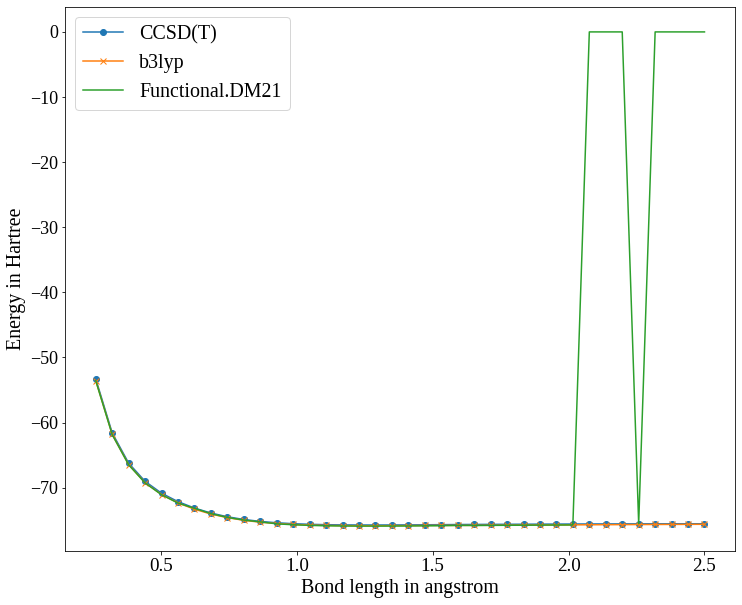

In [165]:

choiceDFT = ['CCSDT', 'b3lyp' , 'Functional.DM21']
plotNand(choiceDFT , myfigsize=(12, 10), myfontsize=20)

<Figure size 432x288 with 0 Axes>

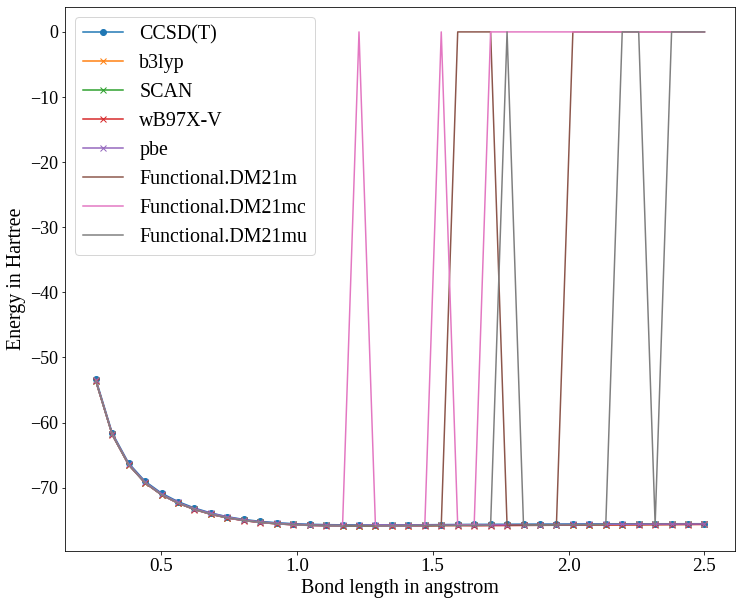

In [147]:

choiceDFT = ['CCSDT', 'b3lyp' , 'SCAN' , 'wB97X-V', 'pbe' , 'Functional.DM21m', 'Functional.DM21mc' , 'Functional.DM21mu']
plotNand(choiceDFT , myfigsize=(12, 10), myfontsize=20)

<Figure size 432x288 with 0 Axes>

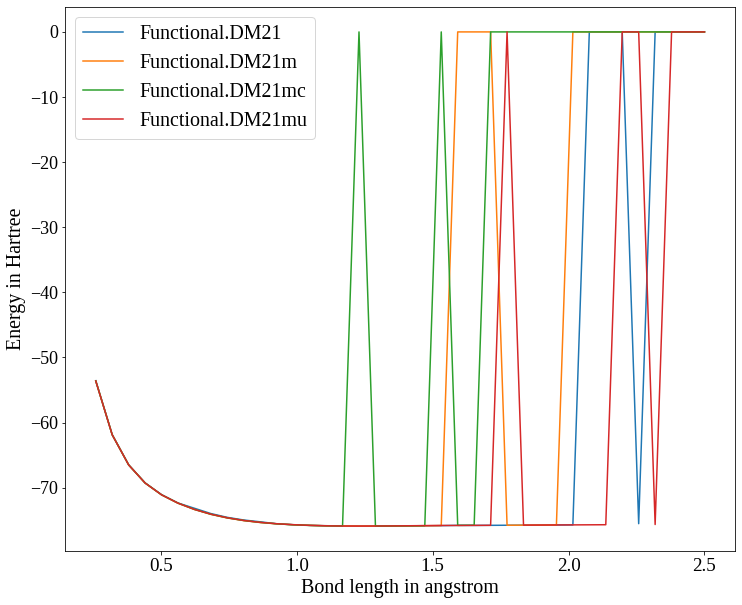

In [148]:

choiceDFT = [ 'Functional.DM21',  'Functional.DM21m', 'Functional.DM21mc' , 'Functional.DM21mu']
plotNand(choiceDFT , myfigsize=(12, 10), myfontsize=20)

<Figure size 432x288 with 0 Axes>

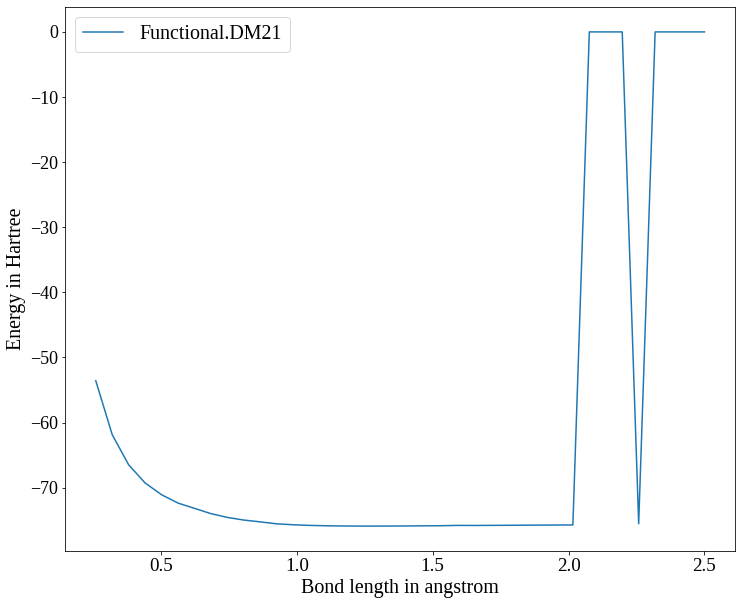

In [149]:

choiceDFT = [ 'Functional.DM21']
plotNand(choiceDFT , myfigsize=(12, 10), myfontsize=20)

<Figure size 432x288 with 0 Axes>

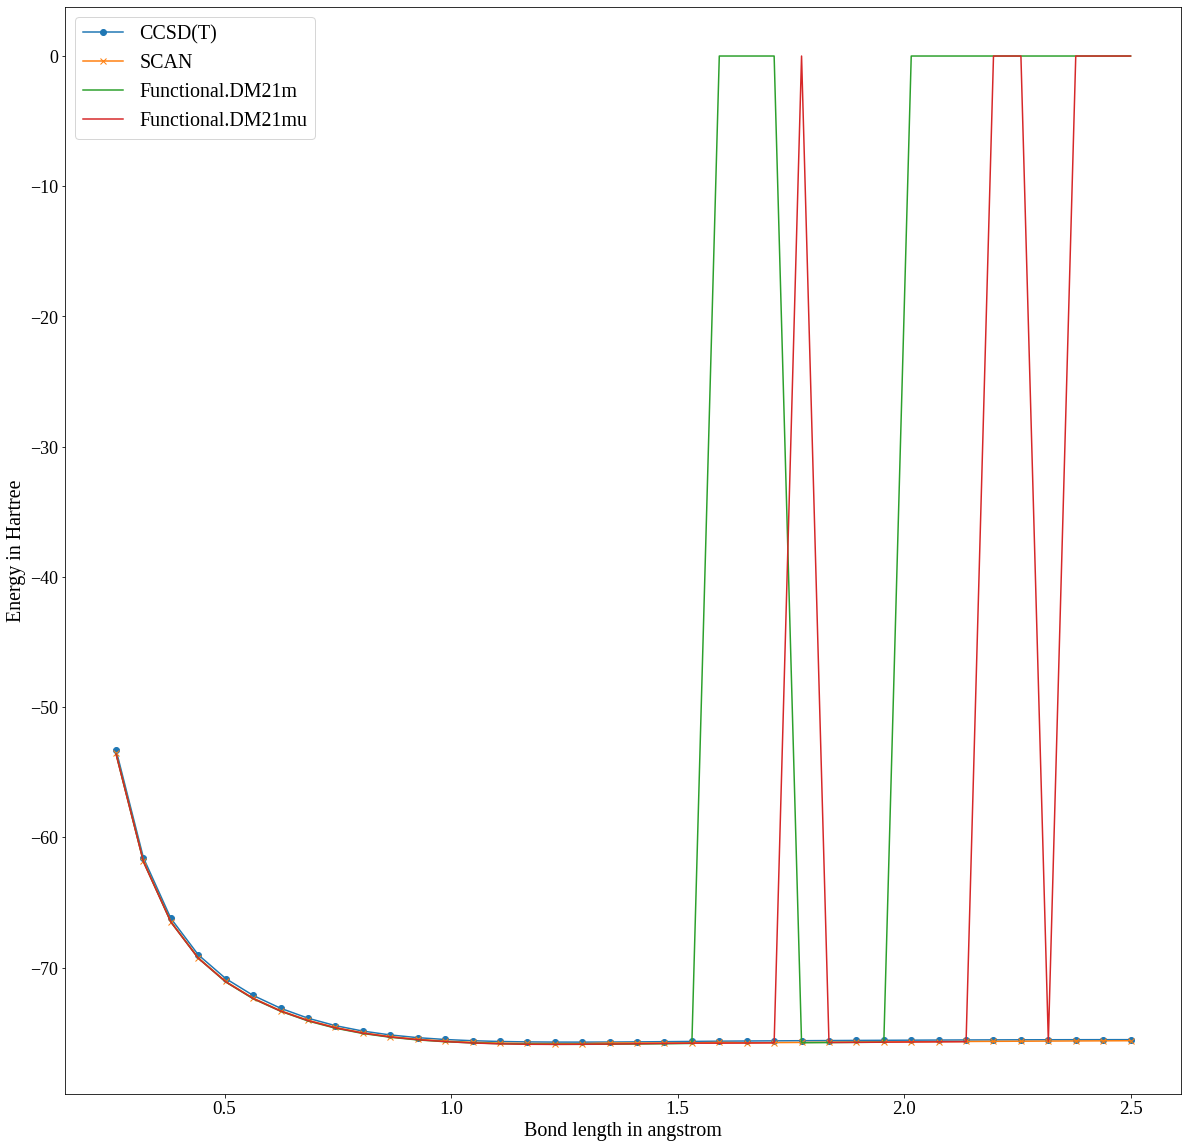

In [150]:
choiceDFT = ['CCSDT',   'SCAN' , 'Functional.DM21m',  'Functional.DM21mu']
plotNand(choiceDFT , myfigsize=(20, 20), myfontsize=20)

<Figure size 432x288 with 0 Axes>

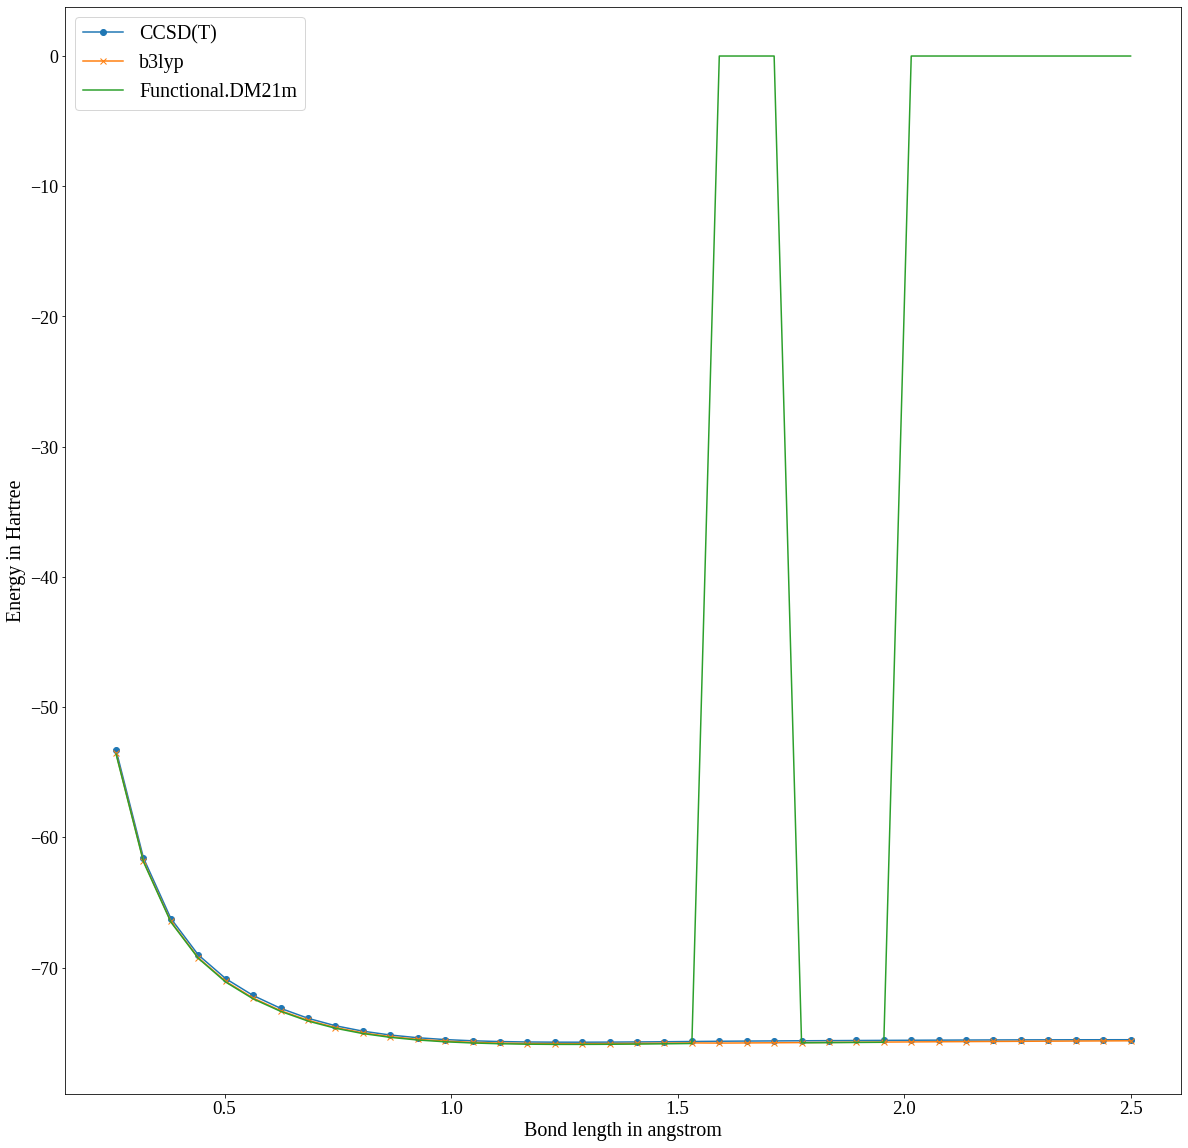

In [151]:
choiceDFT = ['CCSDT',   'b3lyp' ,    'Functional.DM21m']
plotNand(choiceDFT , myfigsize=(20, 20), myfontsize=20)

<Figure size 432x288 with 0 Axes>

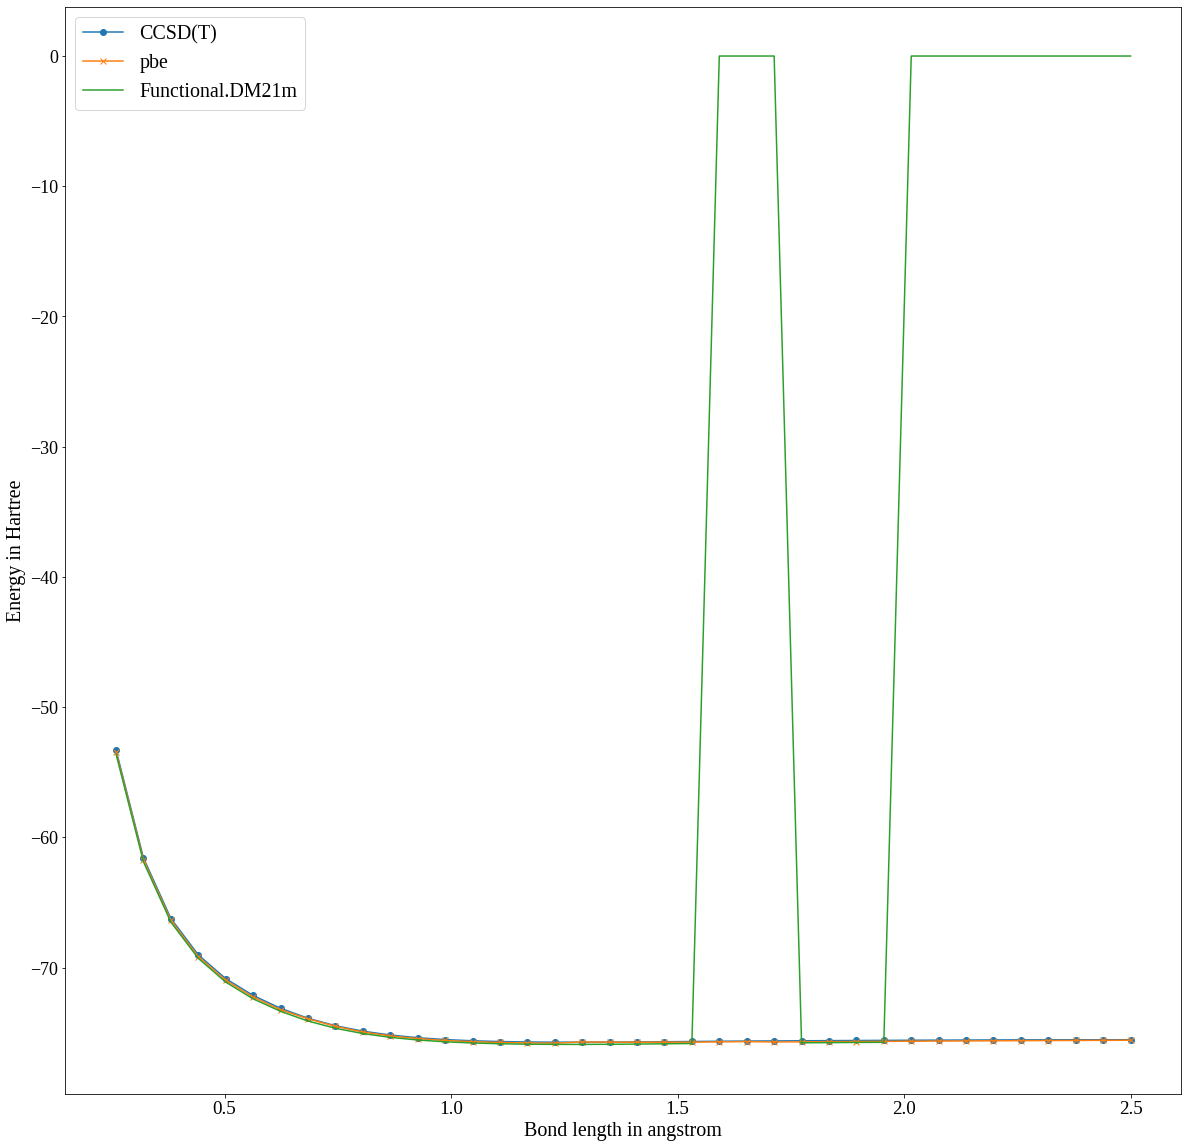

In [152]:
choiceDFT = ['CCSDT',   'pbe' ,    'Functional.DM21m']
plotNand(choiceDFT , myfigsize=(20, 20), myfontsize=20)

In [179]:
def plotNandZOOM(choiceDFT , myfigsize=(12, 10), myfontsize=20, ylimits=[-170,-10], xlimits=[0, 4]):
  plt.figure(0)


  plt.figure(figsize=myfigsize)
  print()
  plt.rcParams["font.family"] = "Liberation Serif"

  axes = plt.axes()
  axes.set_ylim(ylimits  )
  axes.set_xlim(xlimits )

  lengendlist =[]

  if 'CCSDT' in choiceDFT:
    plt.plot(df['bond_lenght'].to_numpy() , df['CCSDT'].to_numpy()  , 'o-')
    lengendlist.append('CCSD(T)')



  for afunctionals in functionalsList:
    if afunctionals in choiceDFT:
      plt.plot(df['bond_lenght'].to_numpy() , df['DFT-'+str(afunctionals)].to_numpy() , 'x-' )
      lengendlist.append(str(afunctionals))

  for aDMFunctionalvalue in dm21.Functional:
    if str(aDMFunctionalvalue) in choiceDFT:
      plt.plot(df['bond_lenght'].to_numpy() , df['NN-'+str(aDMFunctionalvalue)].to_numpy()  )
      lengendlist.append(str(aDMFunctionalvalue))



  plt.legend(lengendlist,  fontsize = myfontsize+4)
  plt.rc('xtick',labelsize=myfontsize-4)
  plt.rc('ytick',labelsize=myfontsize-4)
  plt.ylabel('Energy in Hartree', fontsize = myfontsize)
  plt.xlabel('Internuclear distance in angstrom', fontsize = myfontsize)
  plt.show()

<Figure size 432x288 with 0 Axes>

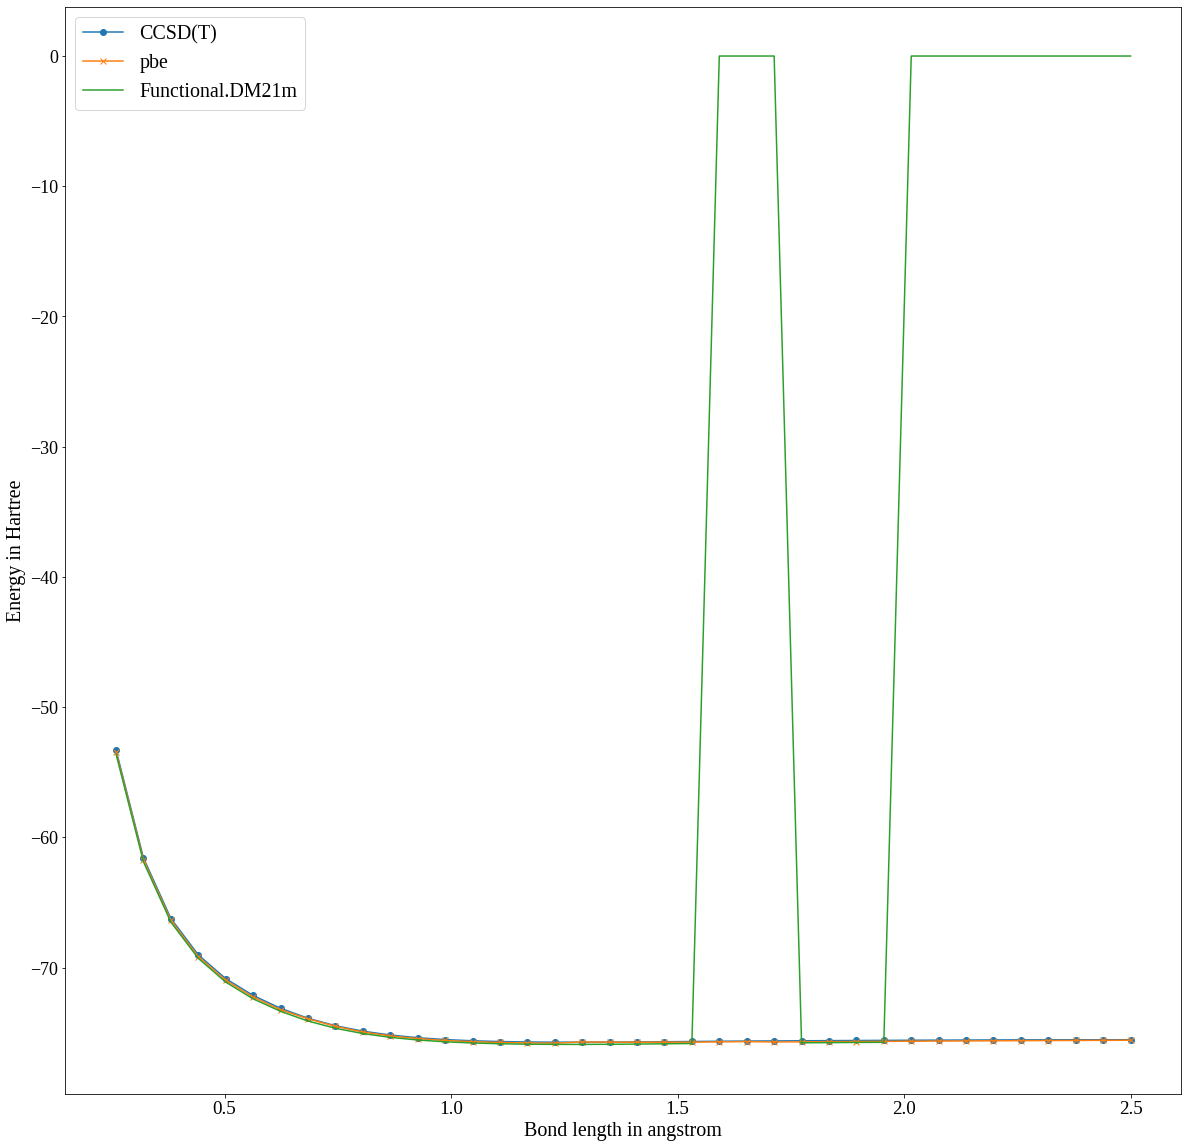

In [154]:
choiceDFT = ['CCSDT',   'pbe' ,    'Functional.DM21m']
plotNand(choiceDFT , myfigsize=(20, 20), myfontsize=20)

<Figure size 432x288 with 0 Axes>

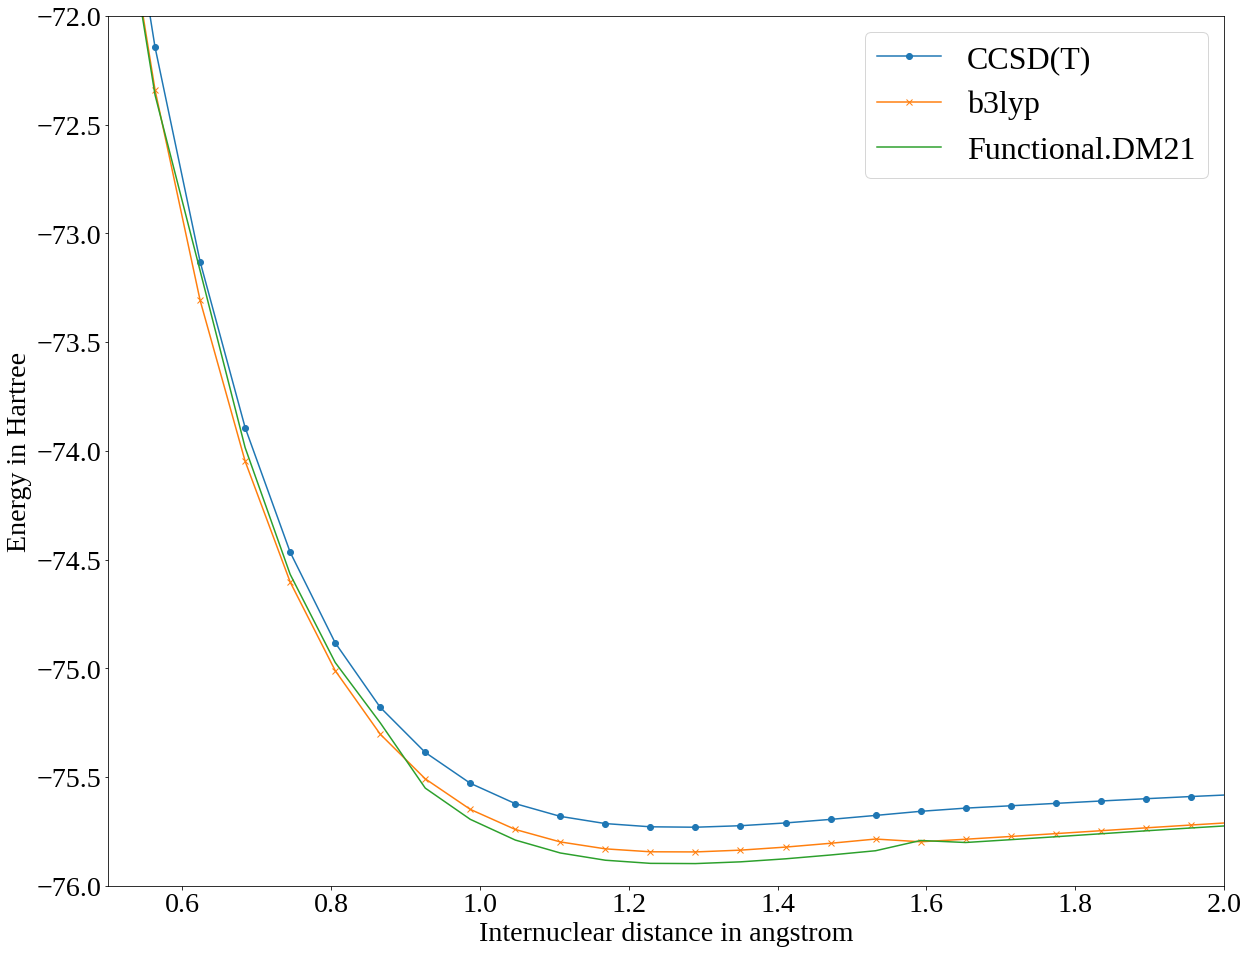

In [180]:
choiceDFT = ['CCSDT',    'b3lyp',  'Functional.DM21' ]
 
plotNandZOOM(choiceDFT , myfigsize=(20, 16), myfontsize=28, ylimits = [-76, -72], xlimits = [0.5, 2])

<Figure size 432x288 with 0 Axes>

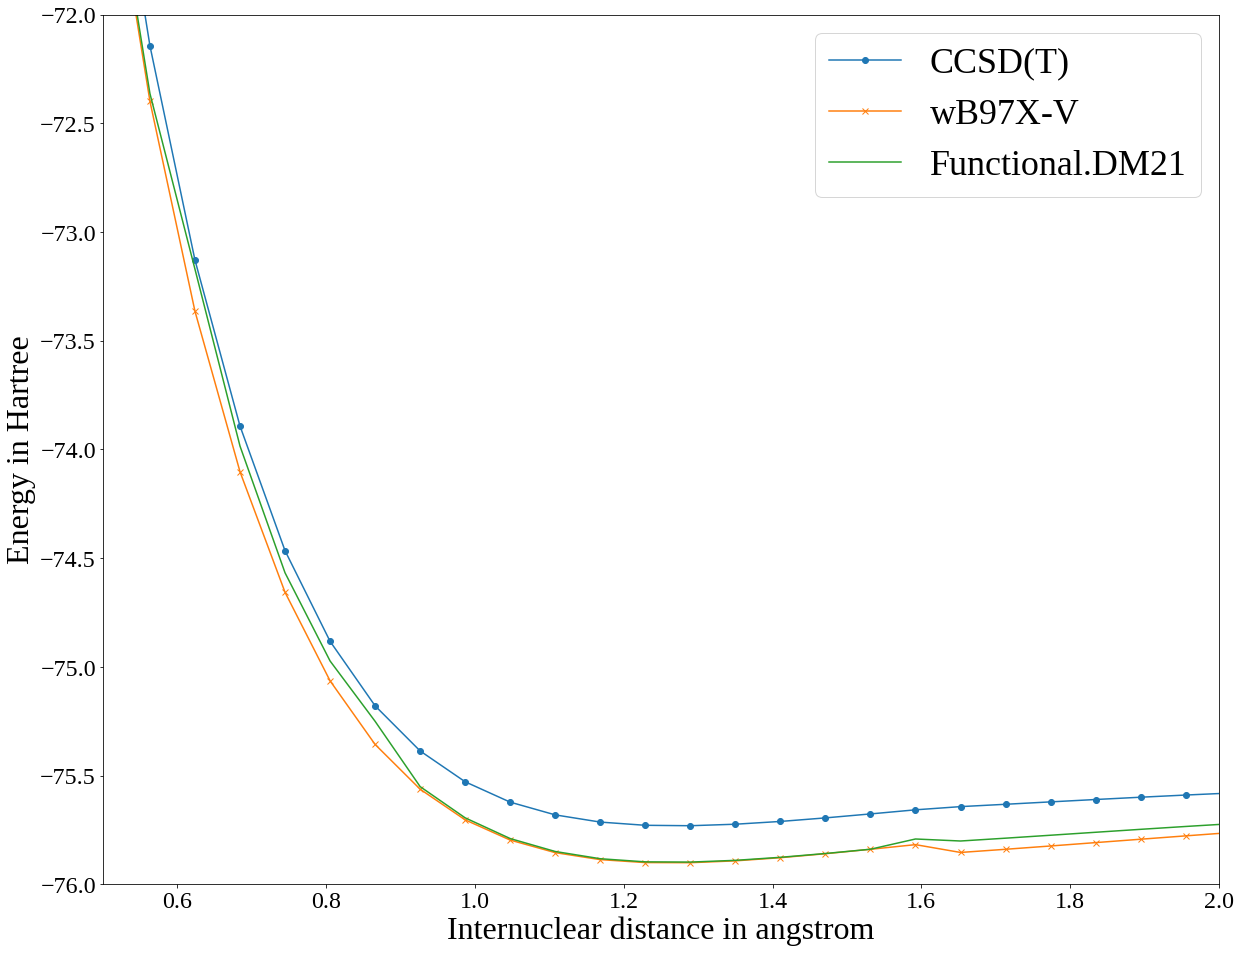

In [181]:
choiceDFT = ['CCSDT',    'wB97X-V',  'Functional.DM21' ]
 
plotNandZOOM(choiceDFT , myfigsize=(20, 16), myfontsize=32, ylimits = [-76, -72], xlimits = [0.5, 2])

<Figure size 432x288 with 0 Axes>

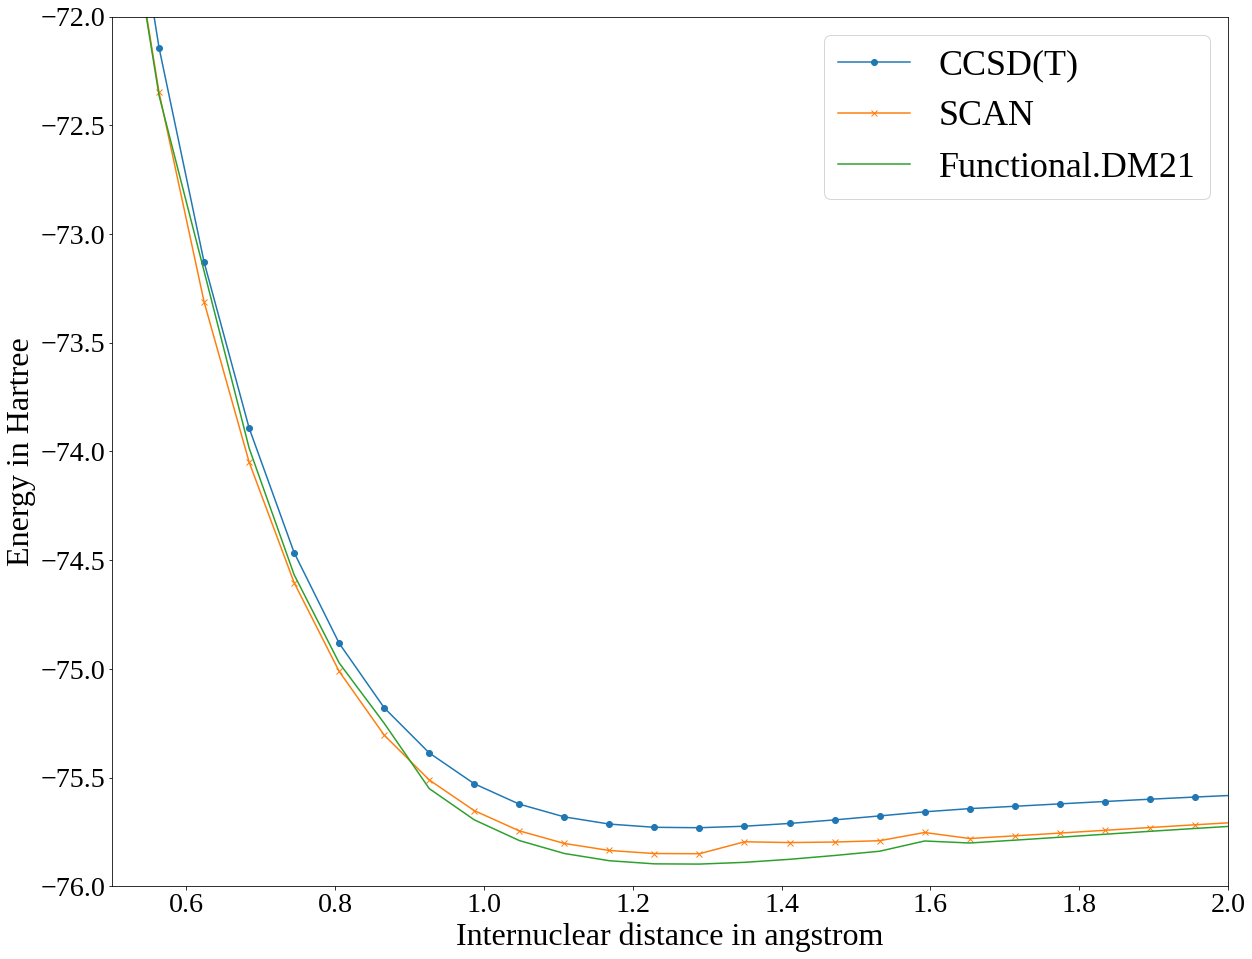

In [183]:
choiceDFT = ['CCSDT',    'SCAN',  'Functional.DM21' ]
 
plotNandZOOM(choiceDFT , myfigsize=(20, 16), myfontsize=32, ylimits = [-76, -72], xlimits = [0.5, 2])

<Figure size 432x288 with 0 Axes>

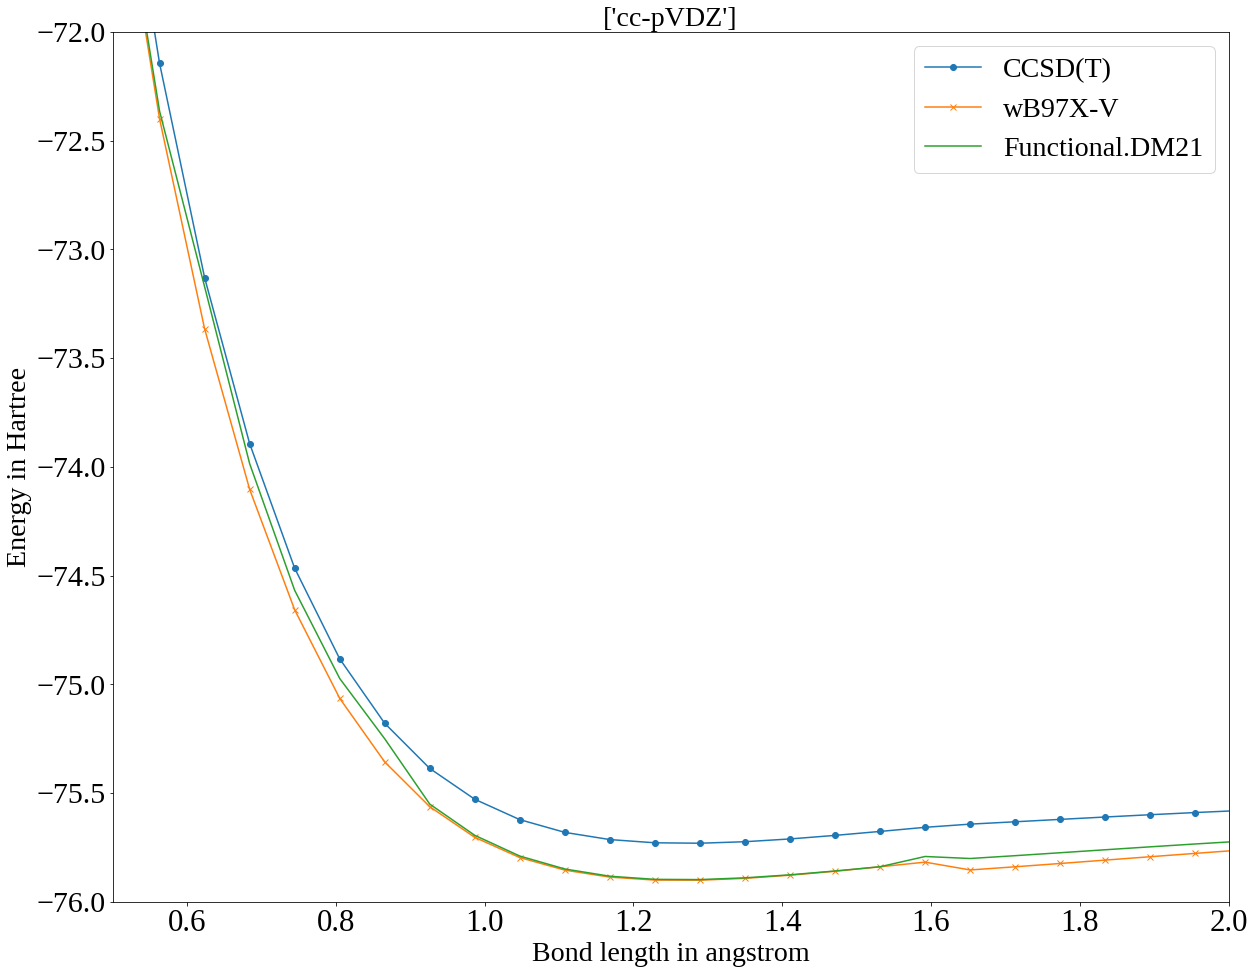

In [170]:
choiceDFT = ['CCSDT',    'wB97X-V',  'Functional.DM21' ]
 
plotNandZOOM(choiceDFT , myfigsize=(20, 16), myfontsize=28, ylimits = [-76, -72], xlimits = [0.5, 2])

<Figure size 432x288 with 0 Axes>

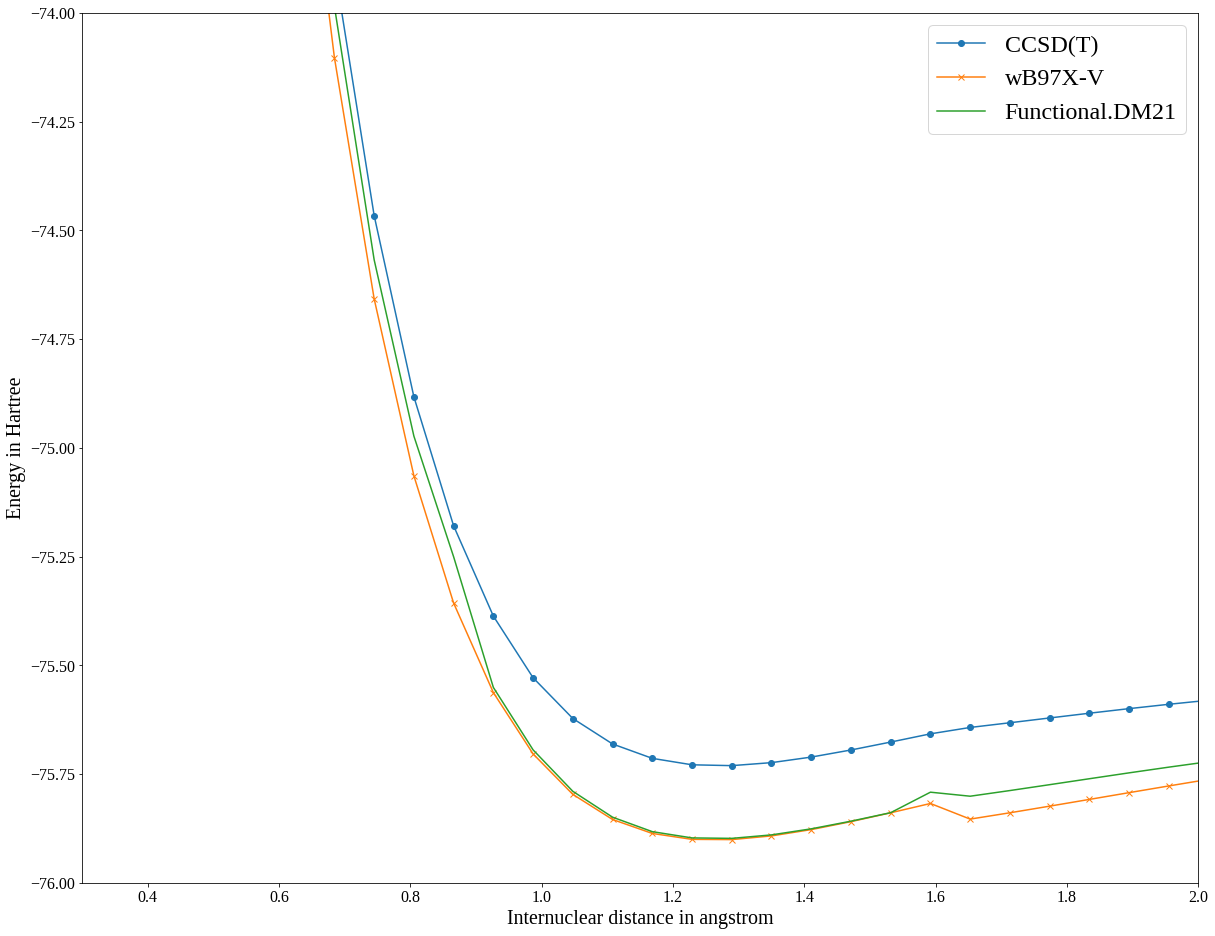

In [187]:
choiceDFT = ['CCSDT',    'wB97X-V',   'Functional.DM21'  ]
 
plotNandZOOM(choiceDFT , myfigsize=(20, 16), myfontsize=20, ylimits = [-76, -74], xlimits = [0.3, 2])

<Figure size 432x288 with 0 Axes>

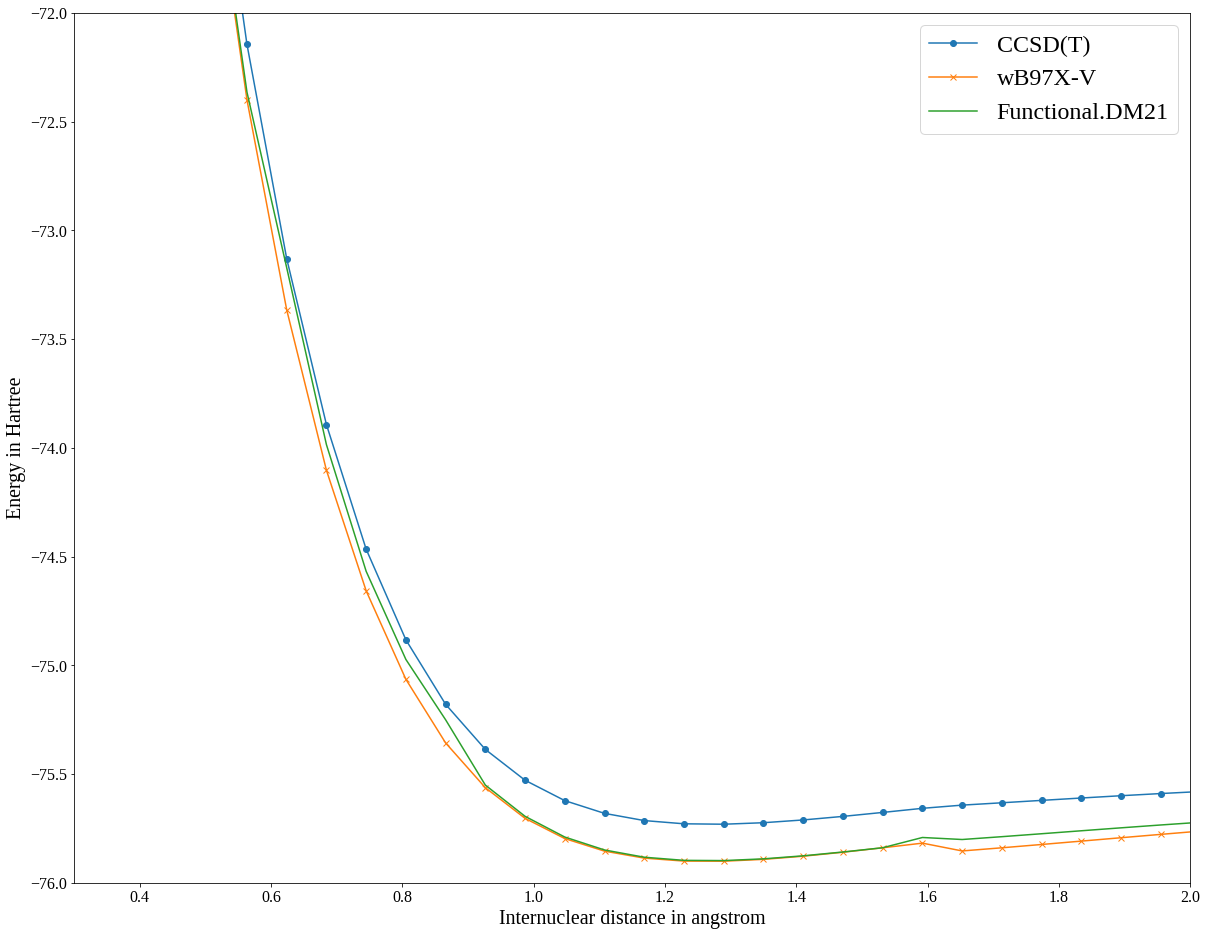

In [188]:
choiceDFT = ['CCSDT',    'wB97X-V',   'Functional.DM21'  ]
 
plotNandZOOM(choiceDFT , myfigsize=(20, 16), myfontsize=20, ylimits = [-76, -72], xlimits = [0.3, 2])

<Figure size 432x288 with 0 Axes>

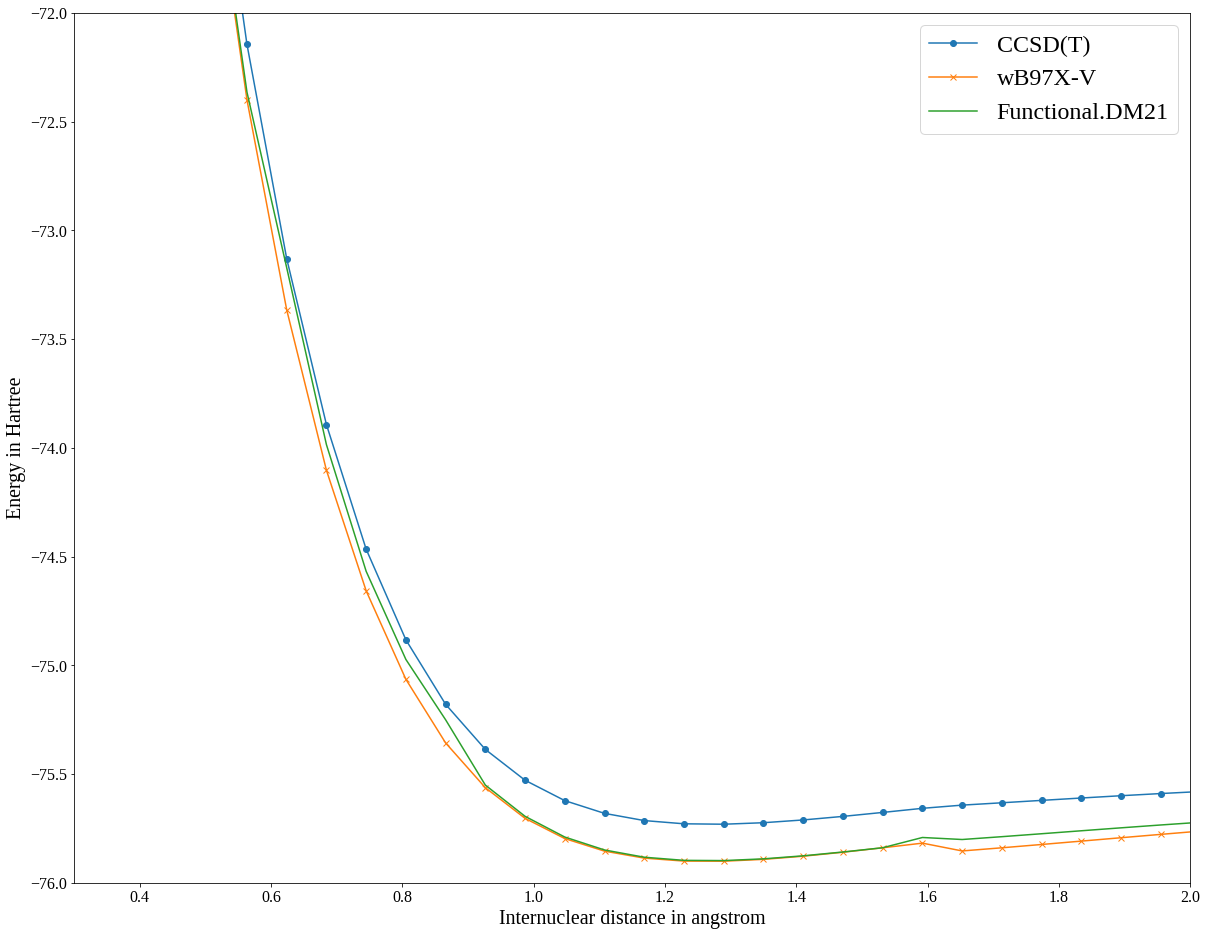

In [194]:
choiceDFT = ['CCSDT',    'wB97X-V',   'Functional.DM21'  ]
 
plotNandZOOM(choiceDFT , myfigsize=(20, 16), myfontsize=20, ylimits = [-76, -72], xlimits = [0.3, 2])

<Figure size 432x288 with 0 Axes>

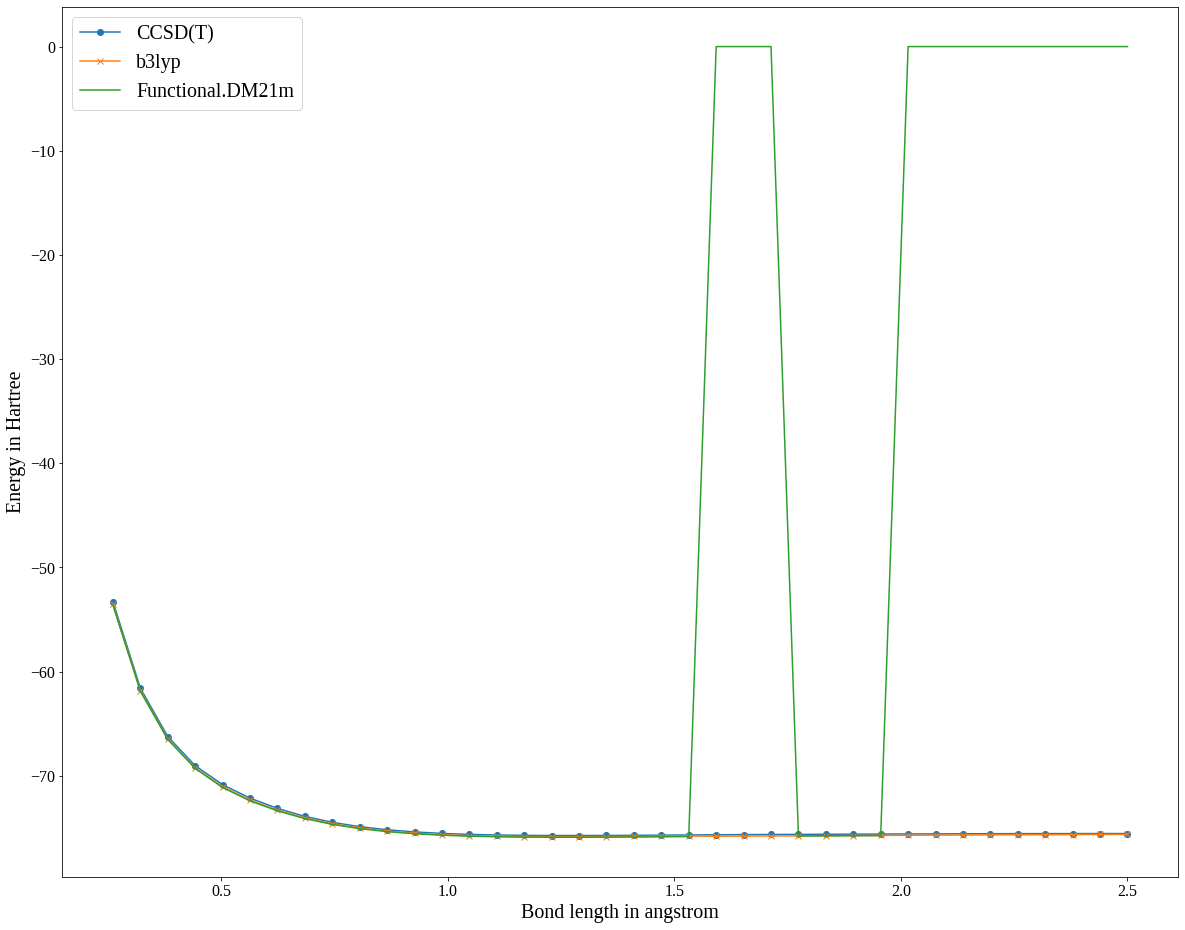

In [195]:
choiceDFT = ['CCSDT', 'b3lyp' , 'Functional.DM21m']
plotNand(choiceDFT , myfigsize=(20, 16), myfontsize=20)

<Figure size 432x288 with 0 Axes>

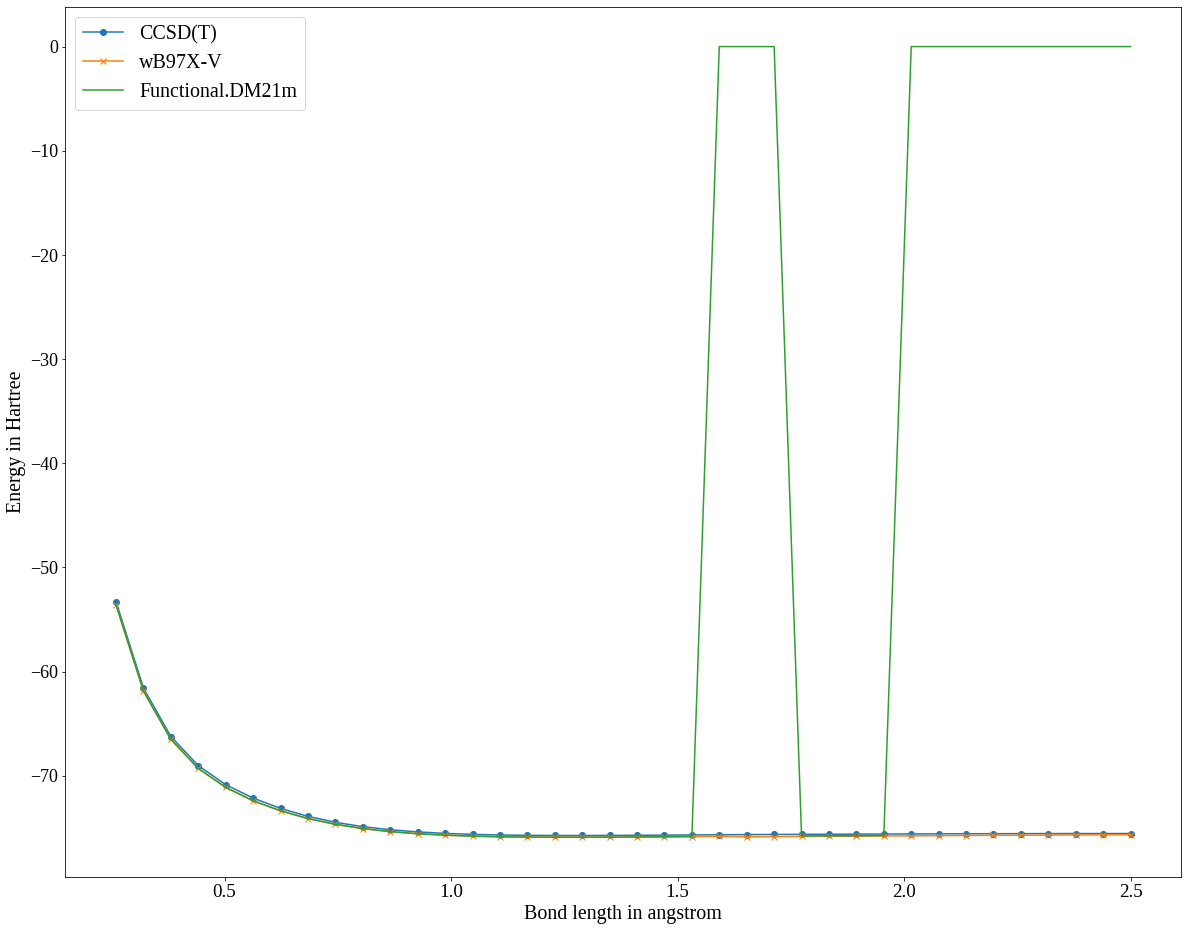

In [158]:
choiceDFT = ['CCSDT', 'wB97X-V' , 'Functional.DM21m']
plotNand(choiceDFT , myfigsize=(20, 16), myfontsize=20)

In [159]:




def plotNandZOOM(choiceDFT , myfigsize=(12, 10), myfontsize=20, ylimits=[-170,-10], xlimits=[0, 4]):
  plt.figure(0)


  plt.figure(figsize=myfigsize)
  plt.rcParams["font.family"] = "Liberation Serif"

  axes = plt.axes()
  axes.set_ylim(ylimits  )
  axes.set_xlim(xlimits )

  lengendlist =[]

  if 'CCSDT' in choiceDFT:
    plt.plot(df['bond_lenght'].to_numpy() , df['CCSDT'].to_numpy()  , 'o-')
    lengendlist.append('CCSD(T)')



  for afunctionals in functionalsList:
    if afunctionals in choiceDFT:
      plt.plot(df['bond_lenght'].to_numpy() , df['DFT-'+str(afunctionals)].to_numpy() , 'x-' )
      lengendlist.append(str(afunctionals))

  for aDMFunctionalvalue in dm21.Functional:
    if str(aDMFunctionalvalue) in choiceDFT:
      plt.plot(df['bond_lenght'].to_numpy() , df['NN-'+str(aDMFunctionalvalue)].to_numpy()  )
      lengendlist.append(str(aDMFunctionalvalue))



  plt.legend(lengendlist,  fontsize = myfontsize)
  plt.rc('xtick',labelsize=myfontsize-1)
  plt.rc('ytick',labelsize=myfontsize-2)
  plt.ylabel('Energy in Hartree', fontsize = myfontsize)
  plt.xlabel('Bond length in angstrom', fontsize = myfontsize)
  plt.title(ValidatedBasisSet, fontsize = myfontsize)
  plt.show()




In [160]:
df

,Unnamed: 0,Weight,Element,Molecule,BasisSet,Spin,BuiltMolecule,bond_lenght,CCSDT,DFT-b3lyp,DFT-SCAN,DFT-wB97X-V,DFT-pbe,NN-Functional.DM21,NN-Functional.DM21m,NN-Functional.DM21mc,NN-Functional.DM21mu
0,0,6,C,"[['C', (0, 0, 0.13026315789473686)], ['C', (0,...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.260526,-53.286092,-53.539401,-53.546494,-53.570925,-53.446341,-53.574355,-53.602923,-53.599676,-53.611941
1,1,6,C,"[['C', (0, 0, 0.16052631578947368)], ['C', (0,...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.321053,-61.585579,-61.822928,-61.833661,-61.861493,-61.731977,-61.856723,-61.880358,-61.881387,-61.887944
2,2,6,C,"[['C', (0, 0, 0.1907894736842105)], ['C', (0, ...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.381579,-66.231449,-66.458121,-66.469260,-66.503398,-66.370934,-66.488831,-66.508895,-66.506110,-66.512298
3,3,6,C,"[['C', (0, 0, 0.22105263157894736)], ['C', (0,...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.442105,-69.029112,-69.246246,-69.257448,-69.298001,-69.163163,-69.273247,-69.292019,-69.284384,-69.292279
4,4,6,C,"[['C', (0, 0, 0.25131578947368416)], ['C', (0,...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.502632,-70.850693,-71.058468,-71.069616,-71.115256,-70.979325,-71.082590,-71.114929,-71.095071,-71.098378
5,5,6,C,"[['C', (0, 0, 0.28157894736842104)], ['C', (0,...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.563158,-72.143688,-72.340166,-72.349176,-72.398784,-72.265319,-72.363504,-72.402707,-72.373277,-72.378029
6,6,6,C,"[['C', (0, 0, 0.3118421052631579)], ['C', (0, ...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.623684,-73.129265,-73.307328,-73.312457,-73.364564,-73.236984,-73.171121,-73.359094,-73.339055,-73.342344
7,7,6,C,"[['C', (0, 0, 0.3421052631578947)], ['C', (0, ...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.684211,-73.892468,-74.047309,-74.049247,-74.102635,-73.935788,-73.984728,-74.106711,-74.083403,-74.078533
8,8,6,C,"[['C', (0, 0, 0.37236842105263157)], ['C', (0,...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.744737,-74.465733,-74.602919,-74.603989,-74.657126,-74.509663,-74.567442,-74.659485,-74.643281,-74.633750
9,9,6,C,"[['C', (0, 0, 0.40263157894736834)], ['C', (0,...",cc-pVDZ,0,"{'C': [[0, [6665.0, 0.000692, -0.000146, 0.0],...",0.805263,-74.882511,-75.010294,-75.011777,-75.064186,-74.951546,-74.972895,-75.066617,-75.049774,-75.041070


#validate the energy against NIST bechmarks ..
manually just the ball park number some be matcoed 

https://cccbdb.nist.gov/bseenergy2x.asp shows  
or  http://www.begdb.org/index.php

For C, 
*   CCSD = -75.7656956	
*   CCST(T)/cc-pVQZ is -75.8552316	 




